# Mission - Classifiez automatiquement des informations
# Partie 1 - Identifiez les causes d'attrition au sein d'une ESN

Vous êtes mandaté en tant que Consultant Data Scientist par le département RH de votre client. Il s’agit de l'ESN TechNova Partners, spécialisée dans le conseil en transformation digitale et la vente d’applications en SaaS.
 
Ils font face à un turnover plus élevé que d'habitude et ils souhaitent identifier les causes racines potentielles derrière ces démissions.

## Étape 1 - Effectuez une analyse exploratoire des fichiers de données

### Importation des librairies nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.display import Image, display

### Importation des fichiers envoyés par la responsable SIRH

In [3]:
extrait_eval = pd.read_csv("../Data/Raw/extrait_eval.csv")
extrait_sirh = pd.read_csv("../Data/Raw/extrait_sirh.csv")
extrait_sondage = pd.read_csv("../Data/Raw/extrait_sondage.csv")

## Check du fichier extrait_sirh

#### Vérification de l'importation

In [4]:
extrait_sirh.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


Extrait du système SIRH où l’on va trouver des informations sur la fonction qu’occupe un employé ainsi que son âge, salaire, ancienneté (etc.) ainsi que ses informations sociodémographiques.

#### Nombre de lignes et colonnes pour extrait_sirh

In [5]:
shape_sirh = extrait_sirh.shape
print("Nous avons", shape_sirh[0],"lignes et",shape_sirh[1],"colonnes avant transformation")

Nous avons 1470 lignes et 12 colonnes avant transformation


On retrouve 1470 lignes et 12 colonnes

#### Informations générales sur le fichier extrait_sirh 

In [6]:
extrait_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


### Recommandation 1 : Identifier et nettoyer les colonnes qui correspondent à des informations quantitatives ou qualitatives.
### Recommandation 2 : Commencer par des statistiques descriptives simples sur chacun des trois fichiers.

Avec le tableau d'information générale, on peut déjà identifier les variables quantitatives et qualitatives.
On va retrouver pour les variables qualitatives -> 
* genre
* statut_marital
* departement
* poste


#### On commence par regarder les statistiques descriptives

In [7]:
extrait_sirh.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000


* id_employee -> idéal pour retrouver un employé en particulier / en numérique, besoin de transformer cette information en textuelle / Potentiel fort pour être la jointure avec les 2 autres fichiers

* age -> âge des employés / Moyenne d'âge de 37 ans
* revenu_mensuel -> revenu par mois des employés / revenu max identifié à 19999 alors que la moyenne est de 6503 et une médiane à 4708 alors il faut creuser. Et le revenu le plus faible est de 1009, nous allons l'analyser également.
* nombre_experiences_precedentes -> nombre d'expériences d'un salarié avant l'arrivé dans cette entreprise 
* nombre_heures_travailless -> la colonne a une faute de frappe. De plus ce n'est pas clair, les statistiques indiquent 80 heures pour tout le monde, on ne sait pas à quoi ça correspond. Par semaine (c'est trop) ou par mois (pas assez). A creuser voir à supprimer
* annee_experience_totale : carrière totale du salarié
* annees_dans_l_entreprise : On a moyenne d'ancienneté dans l'entreprise de 7 ans      
* annees_dans_le_poste_actuel : On a une moyenne de 4 ans des salariés au même poste. Par rapport à la moyenne dans l'entreprise de 7 ans, peut être des évolutions de poste au sein de l'entreprise

#### Transformation de id_employee en chaîne de caractères

In [8]:
extrait_sirh['id_employee'] = extrait_sirh['id_employee'].astype(str)

Petite vérification

In [9]:
extrait_sirh['id_employee'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: id_employee
Non-Null Count  Dtype 
--------------  ----- 
1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


#### Check de la variable revenu_mensuel

* On va regarder les salaires au-dessus de 10 000 € pour voir ce que cela donne

In [10]:
extrait_sirh.loc[extrait_sirh['revenu_mensuel']>10000,"poste"].unique()

array(['Senior Manager', 'Directeur Technique', 'Manager',
       'Cadre Commercial', 'Tech Lead', 'Ressources Humaines'],
      dtype=object)

* Les postes indiqués peuvent correspondre à des salaires conséquents (plus que la moyenne). Cependant l'intitulé "Ressources Humaines" peut indiquer beaucoup de choses. Regardons de plus près.

In [11]:
extrait_sirh.loc[
    (extrait_sirh["revenu_mensuel"] > 10000) & 
    (extrait_sirh["poste"] == "Ressources Humaines"),
    :
]

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
510,698,54,M,10725,Marié(e),Ressources Humaines,Ressources Humaines,2,80,16,9,7
789,1098,44,M,10482,Marié(e),Ressources Humaines,Ressources Humaines,9,80,24,20,6


* On peut être étonné car le salaire est conséquent pour ces 2 personnes en étant non Directeur.
* Regardons alors le salaire des Senior Manager des Ressources Humaines.

In [12]:
extrait_sirh.loc[
    (extrait_sirh["departement"] == "Ressources Humaines") & 
    (extrait_sirh["poste"] == "Senior Manager"),
    'revenu_mensuel'
]

105     18844
112     17328
477     18200
535     19141
538     19189
956     19717
962     14026
999     16799
1096    16437
1154    19658
1401    19636
Name: revenu_mensuel, dtype: int64

Les salaires sont plus elevés que les 2 indiqués en tant que Ressources Humaines. Leurs salaires plus elevés que la moyenne sont peut être dû à leur ancienneté dans l'entreprise, respectivement 9 et 20 ans. On ne supprime pas les informations

#### Check de la variable revenu_mensuel pour les bas salaires

In [13]:
extrait_sirh.loc[extrait_sirh['revenu_mensuel']<1500,:].head(15)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
23,30,21,M,1232,Célibataire,Consulting,Assistant de Direction,1,80,0,0,0
149,201,19,F,1483,Célibataire,Consulting,Consultant,1,80,1,1,0
177,243,19,M,1102,Célibataire,Consulting,Consultant,1,80,1,1,0
296,405,18,M,1420,Célibataire,Consulting,Consultant,1,80,0,0,0
301,411,18,F,1200,Célibataire,Commercial,Représentant Commercial,1,80,0,0,0
513,701,20,M,1009,Célibataire,Consulting,Assistant de Direction,1,80,1,1,0
515,704,35,M,1281,Marié(e),Consulting,Consultant,1,80,1,1,0
727,1012,18,M,1051,Célibataire,Consulting,Assistant de Direction,1,80,0,0,0
764,1056,28,M,1052,Marié(e),Commercial,Représentant Commercial,1,80,1,1,0
777,1079,21,F,1416,Célibataire,Consulting,Consultant,1,80,1,1,0


* Rien d'anormal, pour tous les salaires en dessous de 1500 euros, l'expérience totale est entre 0 et 1, ce sont leurs premières années de travail, donc un salaire plus faible.

#### Check de la variable "nombre_heures_travailless"

In [14]:
extrait_sirh['nombre_heures_travailless'].unique()

array([80])

Cette variable est étrange, entre la faute de frappe de la colonne et le nombre d'heures qui est de 80 heures pour l'ensemble des salariés, on peut alors définir cette variable comme étant une erreur. On peut donc supprimer cette colonne.

In [15]:
extrait_sirh = extrait_sirh.drop(columns = 'nombre_heures_travailless')

* Petit récapitulatif

In [16]:
shape_sirh_un = extrait_sirh.shape
print("Nous avons", shape_sirh[0],"lignes et",shape_sirh[1],"colonnes avant transformation")
print("Nous avons", shape_sirh_un[0],"lignes et",shape_sirh_un[1],"colonnes après suppresion du nombre d'heures travaillées")

Nous avons 1470 lignes et 12 colonnes avant transformation
Nous avons 1470 lignes et 11 colonnes après suppresion du nombre d'heures travaillées


#### Regardons également nos variables qualitatives


* genre -> identification par sexe

* statut_marital -> identification si marié/célibataire ou divorcé
* departement -> quel département de l'entreprise un employé fait partie
* poste -> poste occupé par un employé

Ici le principal sujet est de rendre les informations plus lisibles, nous devons enlever les espaces de nos textes ainsi que les accents.

* Variable genre

In [17]:
extrait_sirh['genre'].value_counts()

genre
M    882
F    588
Name: count, dtype: int64

Il y a 588 femmes et 882 hommes recensés. On ne change rien ici.

* Variable statut_marital

In [18]:
extrait_sirh['statut_marital'].value_counts()

statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

* On enlève les accents

In [19]:
extrait_sirh["statut_marital"] = extrait_sirh["statut_marital"].replace({
    "Marié(e)": "Marie",
    "Célibataire": "Celibataire",
    "Divorcé(e)": "Divorce"
})

#### Pour les variables departement et poste, on applique une fonction apply pour gérer les espaces

* Variable departement

In [20]:
extrait_sirh['departement'].value_counts()

departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

In [21]:
extrait_sirh['departement'] = extrait_sirh['departement'].apply(lambda x: x.replace(" ", ""))
extrait_sirh['poste'] = extrait_sirh['poste'].apply(lambda x: x.replace(" ", ""))

Vérification

In [22]:
extrait_sirh['departement'].value_counts()


departement
Consulting            961
Commercial            446
RessourcesHumaines     63
Name: count, dtype: int64

* Variable poste

In [23]:
extrait_sirh['poste'].value_counts()

poste
CadreCommercial           326
AssistantdeDirection      292
Consultant                259
TechLead                  145
Manager                   131
SeniorManager             102
ReprésentantCommercial     83
DirecteurTechnique         80
RessourcesHumaines         52
Name: count, dtype: int64

#### Quelques petites vérifications d'usage.

* Vérification de doublons

In [24]:
extrait_sirh.duplicated(keep = False).any()

np.False_

Nous ne retrouvons pas de doublons ici.

* Proportions manquantes par variable

In [25]:
col_proportions_manquantes = extrait_sirh.isnull().mean()
col_proportions_manquantes

id_employee                       0.0
age                               0.0
genre                             0.0
revenu_mensuel                    0.0
statut_marital                    0.0
departement                       0.0
poste                             0.0
nombre_experiences_precedentes    0.0
annee_experience_totale           0.0
annees_dans_l_entreprise          0.0
annees_dans_le_poste_actuel       0.0
dtype: float64

Pas de valeurs manquantes dans ce fichier.

## Check du fichier extrait_eval

#### Vérification de l'importation

In [26]:
extrait_eval.head()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


Cet extrait d’un autre SI qui est utilisé spécifiquement pour les évaluations annuelles de performance. On y retrouve des informations telles que les notes de ces évaluations et des notes de satisfaction données par les employés.

#### Nombre de lignes et colonnes pour extrait_eval

In [27]:
shape_eval = extrait_eval.shape
print("Nous avons", shape_eval[0],"lignes et",shape_eval[1],"colonnes avant transformation")

Nous avons 1470 lignes et 10 colonnes avant transformation


Même nombre de lignes que le précédent fichier

#### Informations générales

In [28]:
extrait_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

#### Regardons les valeurs que nous avons dans nos colonnes

In [29]:
for col in extrait_eval.columns:
    print(f"\n=== {col} ===")
    print(extrait_eval[col].unique())


=== satisfaction_employee_environnement ===
[2 3 4 1]

=== note_evaluation_precedente ===
[3 2 4 1]

=== niveau_hierarchique_poste ===
[2 1 3 4 5]

=== satisfaction_employee_nature_travail ===
[4 2 3 1]

=== satisfaction_employee_equipe ===
[1 4 2 3]

=== satisfaction_employee_equilibre_pro_perso ===
[1 3 2 4]

=== eval_number ===
['E_1' 'E_2' 'E_4' ... 'E_2064' 'E_2065' 'E_2068']

=== note_evaluation_actuelle ===
[3 4]

=== heure_supplementaires ===
['Oui' 'Non']

=== augementation_salaire_precedente ===
['11 %' '23 %' '15 %' '12 %' '13 %' '20 %' '22 %' '21 %' '17 %' '14 %'
 '16 %' '18 %' '19 %' '24 %' '25 %']


Nous avons ici beaucoup de variables quantitatives discrètes et 2 qualitatives .

* satisfaction_employee_environnement : score allant de 1 à 4

* note_evaluation_precedente : score allant de 1 à 4
* niveau_hierarchique_poste : score allant de 1 à 5
* satisfaction_employee_nature_travail : score allant de 1 à 4
* satisfaction_employee_equipe : score allant de 1 à 4
* satisfaction_employee_equilibre_pro_perso : score allant de 1 à 4
* eval_number : c'est le numéro d'évaluation, nous le comprenons comme l'équivalent de l'identifiant du salarié -> qualitative
* note_evaluation_actuelle : score composé uniquement de 3 et 4
* heure_supplementaires : oui ou non -> qualtitative
* augementation_salaire_precedente : exprimé en % d'augmentation mais en texte alors on va transformer cette variable

Modification de augementation_salaire_precedente

In [30]:
extrait_eval["augementation_salaire_precedente"] = (
    extrait_eval["augementation_salaire_precedente"].apply(lambda x: x.replace(" %",""))
)
extrait_eval["augementation_salaire_precedente"] = (extrait_eval["augementation_salaire_precedente"].astype(int))

Nous en profitons pour modifier le nom comportant une faute de frappe tout en précisant en %

In [31]:
extrait_eval = extrait_eval.rename(columns={"augementation_salaire_precedente":"augmentation_salaire_precedente_pourcent"})

#### Graphique pour comprendre la notation car nous n'avons pas de documentation explicative

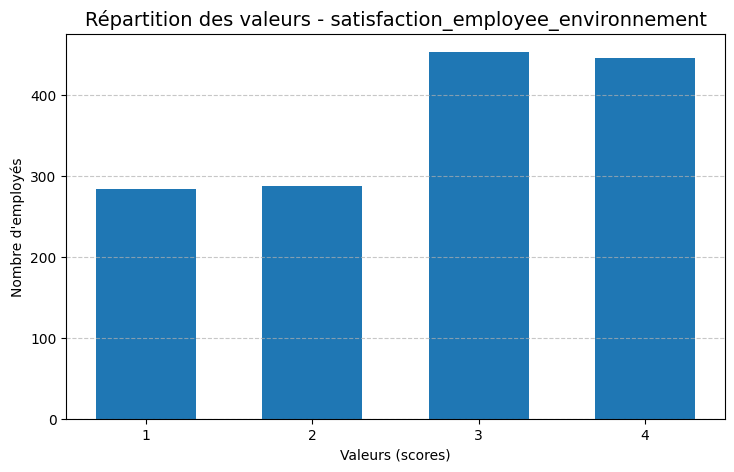

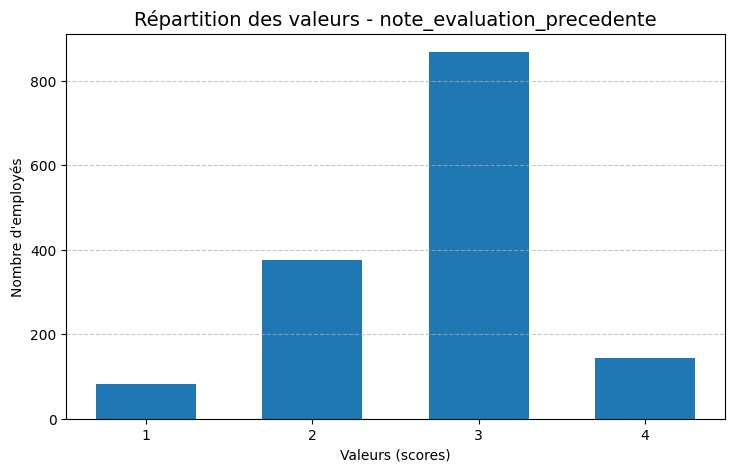

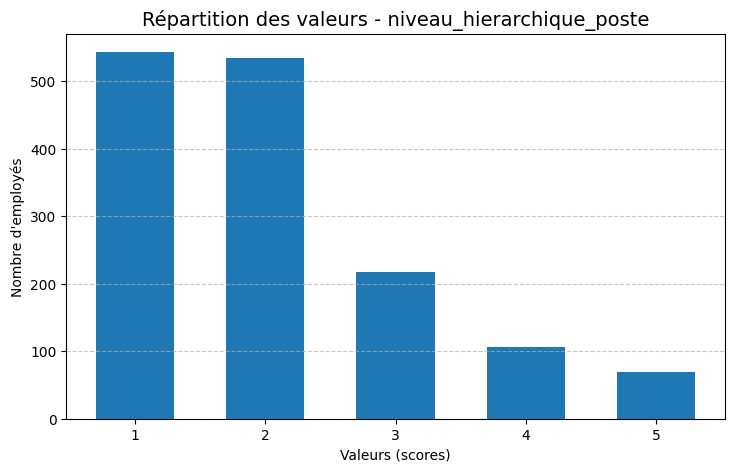

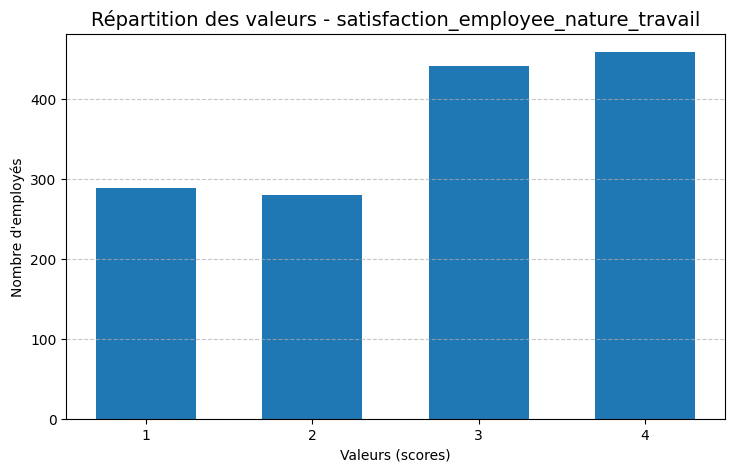

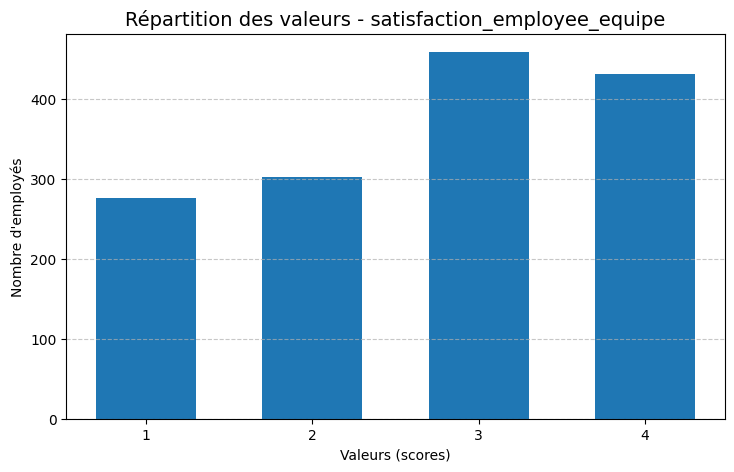

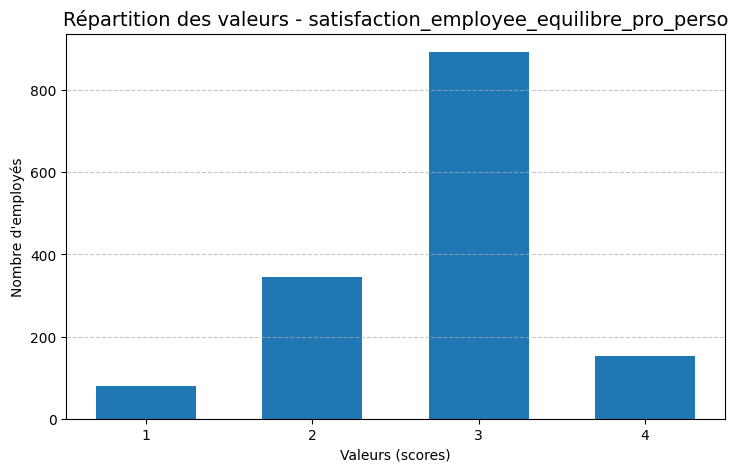

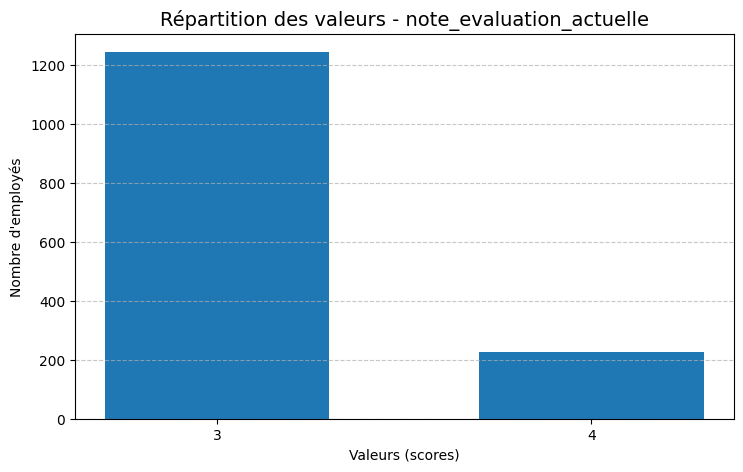

In [32]:
cols_eval = [
    "satisfaction_employee_environnement",
    "note_evaluation_precedente",
    "niveau_hierarchique_poste",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "note_evaluation_actuelle"
]
for col in cols_eval:
    counts = extrait_eval[col].value_counts().sort_index()
    
    plt.figure(figsize=(8.5, 5))
    plt.bar(counts.index, counts.values, width=0.6)
    
    plt.title(f"Répartition des valeurs - {col}", fontsize=14)
    plt.xlabel("Valeurs (scores)")
    plt.ylabel("Nombre d'employés")
    plt.xticks(counts.index)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.show()

* Au vu des illustrations, on peut dire que 1 est le plus mauvais résultat et 4 ou 5 (selon la variable) le meilleur résultat. Car nous voyons beaucoup de 3, ce qui évoque un score plutôt moyen-bon.
* De plus, dans ce style de sondage, la notation est souvent de la plus mauvaise note (1) à la plus haute (4)
* On peut noter logiquement plus de postes recensés dans les niveaux hiérarchiques 1 et 2 que dans les niveaux 3/4 et 5.

* Concernant la variable note_evaluation_actuelle, nous retrouvons que des valeurs de 3 et 4 alors que dans les notes précédentes il y avait l'ensemble des notations présentes. La probabilité de ne pas avoir les notes de 1 et 2 est trop faible et sans précision cette donnée n'est pas exploitable, on peut donc la supprimer.

In [33]:
extrait_eval = extrait_eval.drop(columns='note_evaluation_actuelle')

* Petite vérification

In [34]:
shape_eval_un = extrait_eval.shape
print("Nous avons", shape_eval[0],"lignes et",shape_eval[1],"colonnes avant transformation")
print("Nous avons", shape_eval_un[0],"lignes et",shape_eval_un[1],"colonnes avant transformation")

Nous avons 1470 lignes et 10 colonnes avant transformation
Nous avons 1470 lignes et 9 colonnes avant transformation


#### Quelques vérifications d'usage

Vérification des doublons 

In [35]:
extrait_eval.duplicated(keep =False).any()

np.False_

* Pas de doublons ici

Vérification des valeurs manquantes

In [36]:
col_proportions_manquantes = extrait_eval.isnull().mean()
col_proportions_manquantes

satisfaction_employee_environnement          0.0
note_evaluation_precedente                   0.0
niveau_hierarchique_poste                    0.0
satisfaction_employee_nature_travail         0.0
satisfaction_employee_equipe                 0.0
satisfaction_employee_equilibre_pro_perso    0.0
eval_number                                  0.0
heure_supplementaires                        0.0
augmentation_salaire_precedente_pourcent     0.0
dtype: float64

Pas de valeurs manquantes ici

#### Rassurons nous concernant la colonne que nous pensons être valide pour faire une jointure avec le premier fichier

In [37]:
extrait_eval['eval_number'].tail(3)

1467    E_2064
1468    E_2065
1469    E_2068
Name: eval_number, dtype: object

* L'identifiant s'arrête à 2068

#### On vérifie le dernier identifiant du premier fichier

In [38]:
extrait_sirh['id_employee'].tail(3)

1467    2064
1468    2065
1469    2068
Name: id_employee, dtype: object

* C'est la même chose

#### Nous devons donc transformer notre eval_number pour être sur la même variable

In [39]:
extrait_eval["eval_number"] = extrait_eval["eval_number"].apply(lambda x: x.replace("E_", ""))
extrait_eval['eval_number'].tail(3)

1467    2064
1468    2065
1469    2068
Name: eval_number, dtype: object

* Les éléments sont bien transformés

## Check du fichier extrait_sondage

#### Vérification de l'importation

In [40]:
extrait_sondage.head()

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


Enfin, nous demandons aussi à tous nos employés de remplir annuellement un sondage qui nous aide à mettre en place des actions pour le bien-être des employés. Voici à disposition l’extrait du sondage le plus récent. Nous y avons ajouté un témoin pour indiquer si l’employé a quitté l’entreprise ou non.

#### Nombre de lignes et colonnes pour extrait_sondage

In [41]:
shape_sondage = extrait_sondage.shape
print("Nous avons", shape_sondage[0],"lignes et",shape_sondage[1],"colonnes avant transformation")

Nous avons 1470 lignes et 12 colonnes avant transformation


Même nombre de lignes que les autres fichiers

#### Informations générales

In [42]:
extrait_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

Variables qualitatives (catégorielles)
* a_quitte_l_entreprise : Oui / Non : notre variable cible pour cette mission
* domaine_etude : type de formation 
* ayant_enfants : seulement Oui
* frequence_deplacement

Variables quantitatives (numériques)
* nombre_participation_pee : nb de participations au plan d'épargne d'entreprise
* nb_formations_suivies : nb de formations
* nombre_employee_sous_responsabilite : nb d’employés sous responsabilité 
* code_sondage : c’est un identifiant, pas une vraie variable explicative / troisième clé de jointure
* distance_domicile_travail
* niveau_education : codé en chiffre mais représente un niveau ordinal
* annees_depuis_la_derniere_promotion : nombre d’années
* annes_sous_responsable_actuel : nombre d’années

#### Regardons les statistiques descriptives des variables numériques

In [43]:
extrait_sondage.describe()

,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,2.187755,4.123129
std,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,3.222430,3.568136
min,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,1.000000,3.000000
75%,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,3.000000,7.000000
max,3.000000,6.000000,1.0,2068.000000,29.000000,5.000000,15.000000,17.000000


Même si ce n'est pas correct de l'analyser de cette façon, on voit que le max du code sondage est de 2068, ce qui justifie que c'est bien notre clé de jointure. Par contre il faut le mettre en texte pour cohérence avec le type de donnée et les autres fichiers.

#### On change le format du code_sondage

In [44]:
extrait_sondage['code_sondage'] = extrait_sondage['code_sondage'].astype(str)

#### Regardons ce que nous avons comme valeur unique dans nos colonnes

In [45]:
for col in extrait_sondage.columns:
    print(f"\n=== {col} ===")
    print(extrait_sondage[col].unique())


=== a_quitte_l_entreprise ===
['Oui' 'Non']

=== nombre_participation_pee ===
[0 1 3 2]

=== nb_formations_suivies ===
[0 3 2 5 1 4 6]

=== nombre_employee_sous_responsabilite ===
[1]

=== code_sondage ===
['1' '2' '4' ... '2064' '2065' '2068']

=== distance_domicile_travail ===
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]

=== niveau_education ===
[2 1 4 3 5]

=== domaine_etude ===
['Infra & Cloud' 'Autre' 'Transformation Digitale' 'Marketing'
 'Entrepreunariat' 'Ressources Humaines']

=== ayant_enfants ===
['Y']

=== frequence_deplacement ===
['Occasionnel' 'Frequent' 'Aucun']

=== annees_depuis_la_derniere_promotion ===
[ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]

=== annes_sous_responsable_actuel ===
[ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


#### Changements à apporter
* nombre_employee_sous_responsabilite = 1 pour chaque ligne. Cette colonne n'est pas claire et n'apporte aucune informaton, nous pouvons la supprimer
* Domaine d'étude : besoin de gérer les espaces et les éléments spéciaux
* ayant_enfants : que des oui pour cette variable (ça serait étonnant que 100% ait des enfants), en plus d'être bizarre comme statistique, elle ne nous apporte pas d'informations particulières avec que des oui, on peut donc la supprimer aussi

#### Suppression de nombre_employee_sous_responsabilite

In [46]:
extrait_sondage = extrait_sondage.drop(columns = 'nombre_employee_sous_responsabilite')
extrait_sondage = extrait_sondage.drop(columns = 'ayant_enfants')

Petit récapitulatif

In [47]:
shape_sondage_un = extrait_sondage.shape
print("Nous avons", shape_sondage[0],"lignes et",shape_sondage[1],"colonnes avant transformation")
print("Nous avons", shape_sondage_un[0],"lignes et",shape_sondage_un[1],"colonnes après suppression de nombre_employee_sous_responsabilite")

Nous avons 1470 lignes et 12 colonnes avant transformation
Nous avons 1470 lignes et 10 colonnes après suppression de nombre_employee_sous_responsabilite


#### Suppression des espaces et du & pour la colonne domaine_etude

In [48]:
extrait_sondage['domaine_etude'] = extrait_sondage['domaine_etude'].apply(lambda x: x.replace(" ", ""))
extrait_sondage['domaine_etude'] = extrait_sondage['domaine_etude'].apply(lambda x: x.replace("&", ""))

* Vérification

In [49]:
extrait_sondage['domaine_etude'].unique()

array(['InfraCloud', 'Autre', 'TransformationDigitale', 'Marketing',
       'Entrepreunariat', 'RessourcesHumaines'], dtype=object)

### Recommandation 3 - Identifier les colonnes permettant de réaliser des jointures entre les 3 fichiers

Nous avons identifié une clé de jointure pour chacun des fichiers :
* extrait_sirh : id_employee avec 1470 lignes et 11 colonnes
* extrait_eval : eval_number avec 1470 lignes et 10 colonnes
* extrait_sondage : code_sondage avec 1470 lignes et 9 colonnes

Nous allons appliquer une jointure pour avoir l'ensemble des jeux sur un même DataFrame

#### Nous avons le même nombre de lignes sans doublons avec le même identifiant, on peut donc appliquer un inner join pour notre jointure

Harmonisation des noms de colonnes puis jointure

In [50]:
extrait_eval     = extrait_eval.rename(columns={'eval_number': 'id_employee'})
extrait_sondage  = extrait_sondage.rename(columns={'code_sondage': 'id_employee'})

donnees_rh = (
    extrait_sirh
        .merge(extrait_eval, on='id_employee', how='inner')
        .merge(extrait_sondage, on='id_employee', how='inner')
)

## Recommandation 4 - Bien choisir le type de graphique en fonction des colonnes que vous voulez analyser (quanti vs quanti, quanti vs quali, quali vs quali, etc.).

In [51]:
donnees_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   object
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   annee_experience_totale                    1470 non-null   int64 
 9   annees_dans_l_entreprise                   1470 non-null   int64 
 10  annees_dans_le_poste_actuel         

On retrouve bien le cumul de nombre de colonnes des autres fichiers (sans les 2 autres clés de jointure) et les 1470 lignes.

* Petit récapitulatif

In [52]:
shape_donnees_rh = donnees_rh.shape
print("Nous avons", shape_donnees_rh[0],"lignes et",shape_donnees_rh[1],"colonnes après jointure des 3 fichiers de base")

Nous avons 1470 lignes et 28 colonnes après jointure des 3 fichiers de base


### Petite analyse de la variable "a_quitte_l_entreprise"

In [53]:
donnees_rh['a_quitte_l_entreprise'].value_counts()

a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

Dans ce recensement nous avons 237 personnes qui ont quitté l'entreprise sur un total de 1470.

In [54]:
donnees_rh['a_quitte_l_entreprise'].value_counts(normalize=True)

a_quitte_l_entreprise
Non    0.838776
Oui    0.161224
Name: proportion, dtype: float64

#### Ce que l'on peut déjà voir facilement c'est un déséquilibre de notre jeu de donnée. La classe Oui est minoritaire (≈16%) : il faudra adapter la modélisation.

In [55]:
a_analyser = ['a_quitte_l_entreprise','genre']
donnees_rh[a_analyser].value_counts(normalize=True)

a_quitte_l_entreprise  genre
Non                    M        0.497959
                       F        0.340816
Oui                    M        0.102041
                       F        0.059184
Name: proportion, dtype: float64

In [56]:
fig12 = px.histogram(
    donnees_rh, x='genre',color='a_quitte_l_entreprise',
     barmode='group',title='Relation entre la cible et le genre'
     )
fig12.update_layout(height=500, width=650)
fig12.show()
pio.write_image(fig12,"../Graph/graph_etape_1/Bar_cible_genre.png")

* On voit une tendance plus élevée de départ des hommes que des femmes (10% du total pour les hommes et 6% pour les femmes). Mais à noter une plus grande proportion d'hommes dans l'entreprise.

* Nous avons 16% de l'effectif qui est parti.

### Comparons les statistiques descriptives du "Oui" et "Non" de notre variable cible

In [57]:
analyse_demission = donnees_rh.loc[donnees_rh['a_quitte_l_entreprise']=='Oui',:]

In [58]:
colonnes = ['revenu_mensuel','age','annee_experience_totale','distance_domicile_travail','annees_dans_l_entreprise','annee_experience_totale']
analyse_demission[colonnes].describe()

,revenu_mensuel,age,annee_experience_totale,distance_domicile_travail,annees_dans_l_entreprise,annee_experience_totale
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,4787.092827,33.607595,8.244726,10.632911,5.130802,8.244726
std,3640.210367,9.689350,7.169204,8.452525,5.949984,7.169204
min,1009.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,2373.000000,28.000000,3.000000,3.000000,1.000000,3.000000
50%,3202.000000,32.000000,7.000000,9.000000,3.000000,7.000000
75%,5916.000000,39.000000,10.000000,17.000000,7.000000,10.000000
max,19859.000000,58.000000,40.000000,29.000000,40.000000,40.000000


In [59]:
analyse_non_demission = donnees_rh.loc[donnees_rh['a_quitte_l_entreprise']=='Non',:]

In [60]:
colonnes = ['revenu_mensuel','age','annee_experience_totale','distance_domicile_travail','annees_dans_l_entreprise','annee_experience_totale']
analyse_non_demission[colonnes].describe()

,revenu_mensuel,age,annee_experience_totale,distance_domicile_travail,annees_dans_l_entreprise,annee_experience_totale
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,6832.739659,37.561233,11.862936,8.915653,7.369019,11.862936
std,4818.208001,8.888360,7.760719,8.012633,6.096298,7.760719
min,1051.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,3211.000000,31.000000,6.000000,2.000000,3.000000,6.000000
50%,5204.000000,36.000000,10.000000,7.000000,6.000000,10.000000
75%,8834.000000,43.000000,16.000000,13.000000,10.000000,16.000000
max,19999.000000,60.000000,38.000000,29.000000,37.000000,38.000000


Cela nous donne quelques pistes de réflexion :
* En moyenne le revenu mensuel est plus bas pour les Oui que pour les Non (4787 vs 6832)
* En moyenne les personnes qui ont quitté l'entreprise sont un plus jeune que la moyenne des Non (34 vs 38)
* La distance domicile travail est un peu plus élevée pour les Oui que les Non (11 vs 9)

### Quelques relations entre les variables quantitatives

#### Relation entre l'âge et le revenu mensuel

In [61]:
fig1 = px.scatter(
    donnees_rh,
    x="age",
    y="revenu_mensuel",
    title="Relation entre l'âge et le revenu mensuel"
)
fig1.update_layout(
    width=600,
    height=400,
    title_x=0.5
)
fig1.show()
fig1.update_layout(height=500)
pio.write_image(fig1, "../Graph/graph_etape_1/Relation_age_revenu.png")

* On remarque une tendance globale, évolution du salaire en fonction de l'âge mais nous ne sommes pas dans le cadre d'une distribution linéaire.

#### Relation entre le nombre d'années dans l'entreprise et le revenu mensuel

In [62]:
fig2 = px.scatter(
    donnees_rh,
    x="annees_dans_l_entreprise",
    y="revenu_mensuel",
    title="Relation entre les années dans l'entreprise et le revenu mensuel",
)
fig2.update_layout(
    width=600,
    height=400,
    title_x=0.5
)
fig2.update_traces(
    marker=dict(color="purple", size=8, opacity=0.7))
fig2.show()
pio.write_image(fig2, "../Graph/graph_etape_1/Relation_annees_entreprise_revenu.png")

* On voit ici que le nombre d'années dans l'entreprise n'indique pas un salaire plus conséquent. Ce qui peut être un des problèmes de cette entreprise

#### Relation entre le nombre d'années d'expérience totale et le revenu mensuel

In [63]:
fig3 = px.scatter(
    donnees_rh,
    x="annee_experience_totale",
    y="revenu_mensuel",
    title="Relation entre l'expérience totale et le revenu mensuel",
)
fig3.update_layout(
    width=600,
    height=400,
    title_x=0.5
)
fig3.update_traces(
    marker=dict(color="green", size=8, opacity=0.7))
fig3.show()
pio.write_image(fig3, "../Graph/graph_etape_1/Relation_exp_totale_revenu.png")

* Alors qu'ici on voit une petite tendance globale, une expérience en entreprise plus élevée indique un meilleur salaire. On peut comprendre déjà un malaise dans l'entreprise car les salaires n'augmente pas de manière constante avec l'ancienneté.

#### A noter -> Pas de relation linéaire entre nos variables quantitatives.

#### On regarde la relation entre nos variables quantitatives continues selon la cible (ayant du sens à être regardé de cette manière)

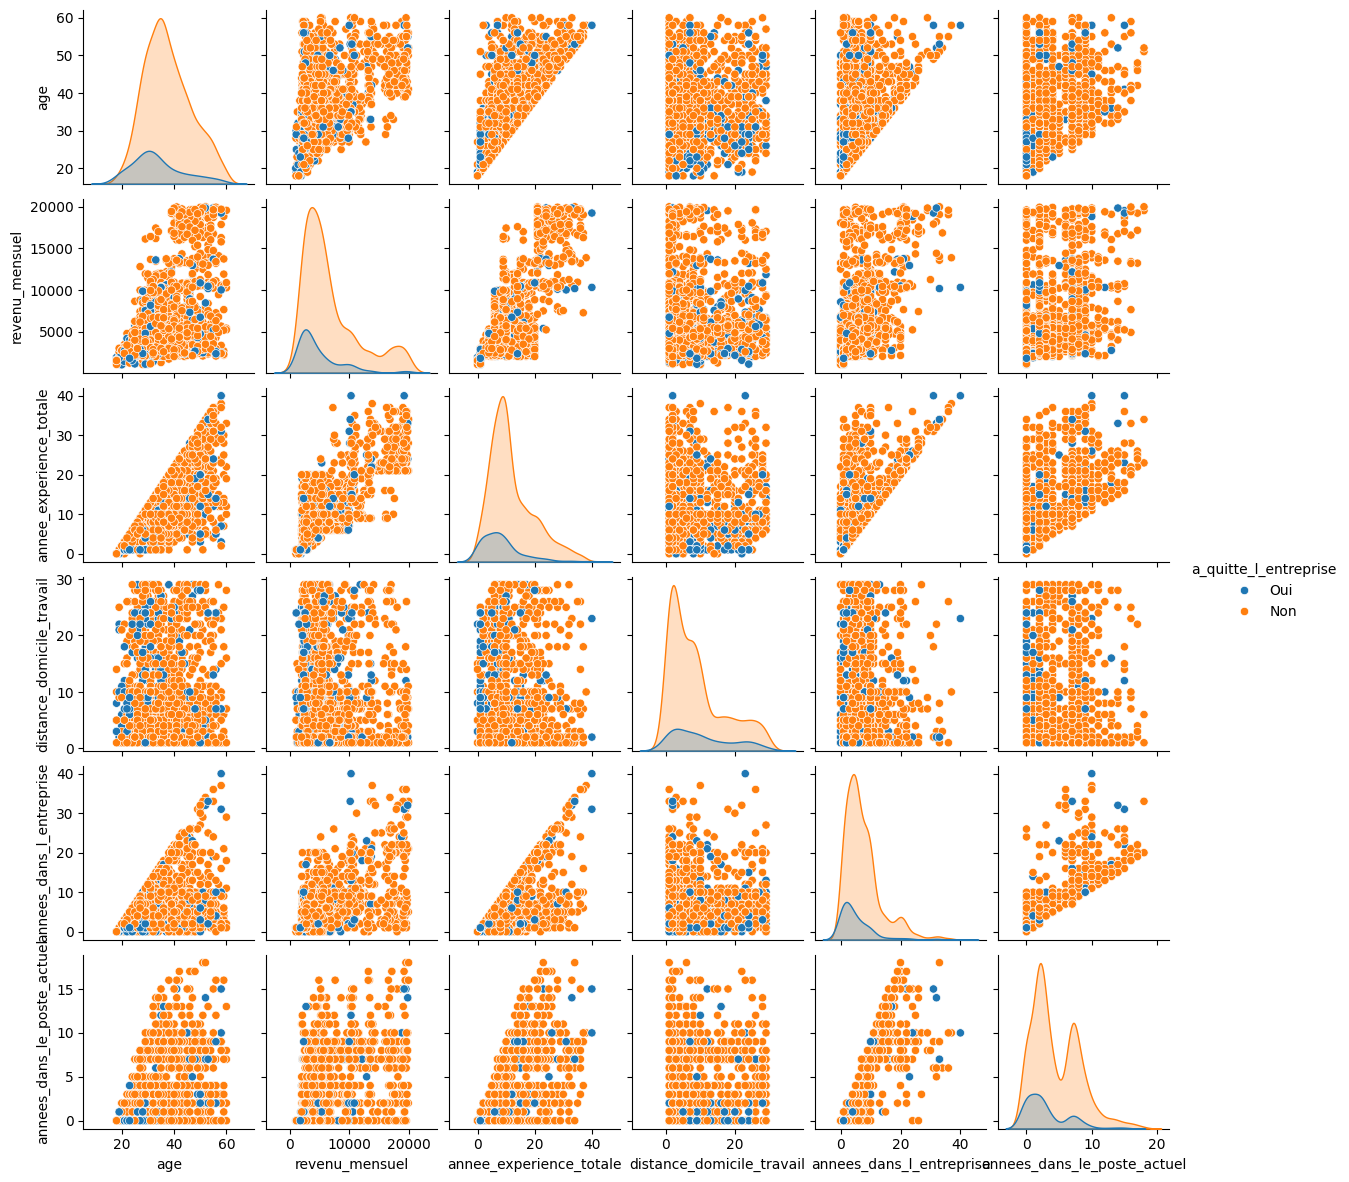

In [64]:
cols = [
    'age', 'revenu_mensuel', 'annee_experience_totale','distance_domicile_travail','annees_dans_l_entreprise','annees_dans_le_poste_actuel','a_quitte_l_entreprise',
    ]
data_pairplot = donnees_rh[cols]

sns.pairplot(data_pairplot, hue = 'a_quitte_l_entreprise', height=2
)
plt.show()

Pas de relations linéaires entre nos variables mais on identifie des tendances globales :
* age : on voit une tendance entre les âges et le nombre d'années (même distrbution par rapport à l'âge pour nos 2 variables années). Petite concentration de gens jeunes qui sont parties avec des salaires plus bas.
* revenu_mensuel : pas de relation plus ou mois constante et le nombre d'années d'expériences totales ou le nombre d'années dans l'entreprise. On peut noter par contre une tendance générale d'augmentation du salaire en fonction de l'âge. Petite concentration de départs pour les gens jeunes avec une distance plus elévé.
* distance_domicile_travail : pas de linéarité mais on constate bien une part jeune des anciens salariés avec une distance domicile travail elevé.

### Analyse par des boxplot des relations avec notre cible

#### Relation entre la cible et la distance domicile travail

In [65]:
fig4 = px.box(
        donnees_rh,
        x='a_quitte_l_entreprise',
        y='distance_domicile_travail',
        title=f"Boxplot interactif - Cible et Distance domicile travail",
     
    )
fig4.update_layout(height=500, width=600)
fig4.show()
pio.write_image(fig4, "../Graph/graph_etape_1/Boxplot_cible_distance.png")


* On observe bien ici une distance plus elevé pour les personnes ayant quitté l'entreprise avec une médiane à 9km pour la catégorie Oui et 7km pour la catégorie Non. 25 % des Oui ont plus de 17km alors qu'en comparaison, 25% des Non ont plus de 13km.

#### Relation entre la cible et le nombre d'années dans l'entreprise

In [66]:
fig5 = px.box(
        donnees_rh,
        x='a_quitte_l_entreprise',
        y='annees_dans_l_entreprise',
        title=f"Boxplot interactif - Cible et Nb d'années dans l'entreprise",
        hover_data = 'id_employee'
    )
fig5.update_layout(height=500, width=600)
fig5.show()
pio.write_image(fig5, "../Graph/graph_etape_1/Boxplot_cible_annees_entr.png")


* On observe que les départs concernent au global les salariés ayant moins d'années dans l'entreprise. Une médiane de 3 ans pour les Oui et 6 pour les Non.
* A l'exception de 12 salariés, dont celui ayant le plus d'ancienneté, 40 ans de boîte. Après ces départs sont peut être dû à un départ à la retraite et ne fait pas partie du turnover.

* On identifie via le boxplot intératif l'identifiant des salariés suivants : 165, 1572, 1038, 825, 1277, 1716, 58, 1167, 1098, 1372, 1127, 1042

In [67]:
employe_a_checker = ['165', '1572', '1038', '825', '1277', '1716', '58', '1167', '1098', '1372', '1127', '1042']
donnees_rh.loc[donnees_rh['id_employee'].isin(employe_a_checker), :]

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,augmentation_salaire_precedente_pourcent,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
45,58,41,F,19545,Marie,Consulting,DirecteurTechnique,1,23,22,...,12,Oui,0,0,12,3,Entrepreunariat,Occasionnel,15,8
126,165,58,F,10312,Marie,Consulting,Manager,1,40,40,...,12,Oui,1,3,23,4,TransformationDigitale,Occasionnel,15,6
595,825,58,M,19246,Celibataire,Consulting,DirecteurTechnique,7,40,31,...,12,Oui,0,2,2,4,InfraCloud,Occasionnel,13,8
749,1038,52,F,19845,Marie,Commercial,SeniorManager,1,33,32,...,15,Oui,1,3,2,1,Marketing,Occasionnel,6,9
752,1042,36,F,2743,Celibataire,Consulting,Consultant,1,18,17,...,16,Oui,0,1,16,4,InfraCloud,Occasionnel,15,14
789,1098,44,M,10482,Marie,RessourcesHumaines,RessourcesHumaines,9,24,20,...,14,Oui,1,1,1,2,TransformationDigitale,Occasionnel,3,6
813,1127,39,M,12169,Divorce,Consulting,Manager,7,21,18,...,11,Oui,3,4,2,3,InfraCloud,Frequent,11,5
838,1167,42,M,13758,Celibataire,Commercial,CadreCommercial,0,22,21,...,12,Oui,0,2,12,3,InfraCloud,Frequent,13,14
913,1277,45,F,18824,Celibataire,Commercial,SeniorManager,2,26,24,...,16,Oui,0,2,2,3,Marketing,Occasionnel,1,11
975,1372,55,M,13695,Celibataire,Commercial,CadreCommercial,6,24,19,...,17,Oui,0,2,13,4,Marketing,Occasionnel,3,8


* Les âges de ces personnes ne justifient pas un départ à la retraite mais bien une volonté de départ, nous devons donc garder ces valeurs en décalage.

In [68]:
donnees_rh.loc[donnees_rh['a_quitte_l_entreprise']=='Oui','annees_dans_l_entreprise'].mean()

np.float64(5.1308016877637135)

In [69]:
donnees_rh['annees_dans_l_entreprise'].mean()

np.float64(7.0081632653061225)

* On a donc bien une moyenne d'ancienneté plus faible pour ceux qui quittent l'entreprise

#### Relation entre la cible et le revenu mensuel

In [70]:
fig6 = px.box(
        donnees_rh,
        x='a_quitte_l_entreprise',
        y='revenu_mensuel',
        title=f"Boxplot interactif - Cible et revenu",
        hover_data = "id_employee"
     
    )
fig6.update_layout(height=500, width=600)
fig6.show()
pio.write_image(fig6, "../Graph/graph_etape_1/Boxplot_cible_revenu_mensuel.png")

* On note bien une différence de revenu entre les départs et les non départs. On remarque quelques démissions sur quelques gros revenus. On les identifie ci-dessous :

In [71]:
employe_a_checker = ['787', '58', '825','1277', '1167', '1372', '582', '986', '1716', '1127', '376']
donnees_rh.loc[donnees_rh['id_employee'].isin(employe_a_checker), :]

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,augmentation_salaire_precedente_pourcent,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
45,58,41,F,19545,Marie,Consulting,DirecteurTechnique,1,23,22,...,12,Oui,0,0,12,3,Entrepreunariat,Occasionnel,15,8
271,376,47,M,11849,Marie,Consulting,SeniorManager,1,10,10,...,12,Oui,1,2,29,4,InfraCloud,Aucun,9,9
435,582,33,M,13610,Marie,Consulting,SeniorManager,7,15,7,...,12,Oui,0,2,15,1,TransformationDigitale,Occasionnel,7,7
568,787,55,M,19859,Marie,Consulting,SeniorManager,5,24,5,...,13,Oui,1,2,2,3,TransformationDigitale,Occasionnel,1,4
595,825,58,M,19246,Celibataire,Consulting,DirecteurTechnique,7,40,31,...,12,Oui,0,2,2,4,InfraCloud,Occasionnel,13,8
706,986,40,F,13194,Celibataire,Commercial,CadreCommercial,4,22,1,...,16,Oui,0,2,24,3,InfraCloud,Aucun,0,0
813,1127,39,M,12169,Divorce,Consulting,Manager,7,21,18,...,11,Oui,3,4,2,3,InfraCloud,Frequent,11,5
838,1167,42,M,13758,Celibataire,Commercial,CadreCommercial,0,22,21,...,12,Oui,0,2,12,3,InfraCloud,Frequent,13,14
913,1277,45,F,18824,Celibataire,Commercial,SeniorManager,2,26,24,...,16,Oui,0,2,2,3,Marketing,Occasionnel,1,11
975,1372,55,M,13695,Celibataire,Commercial,CadreCommercial,6,24,19,...,17,Oui,0,2,13,4,Marketing,Occasionnel,3,8


* Pour le moment pas de raison apparente à leur départ. Peut être font-il partie d'un turnover plutôt classique et non dû spécifiquement à un problème dans l'entreprise.

#### Analyse des boxplot des sondages

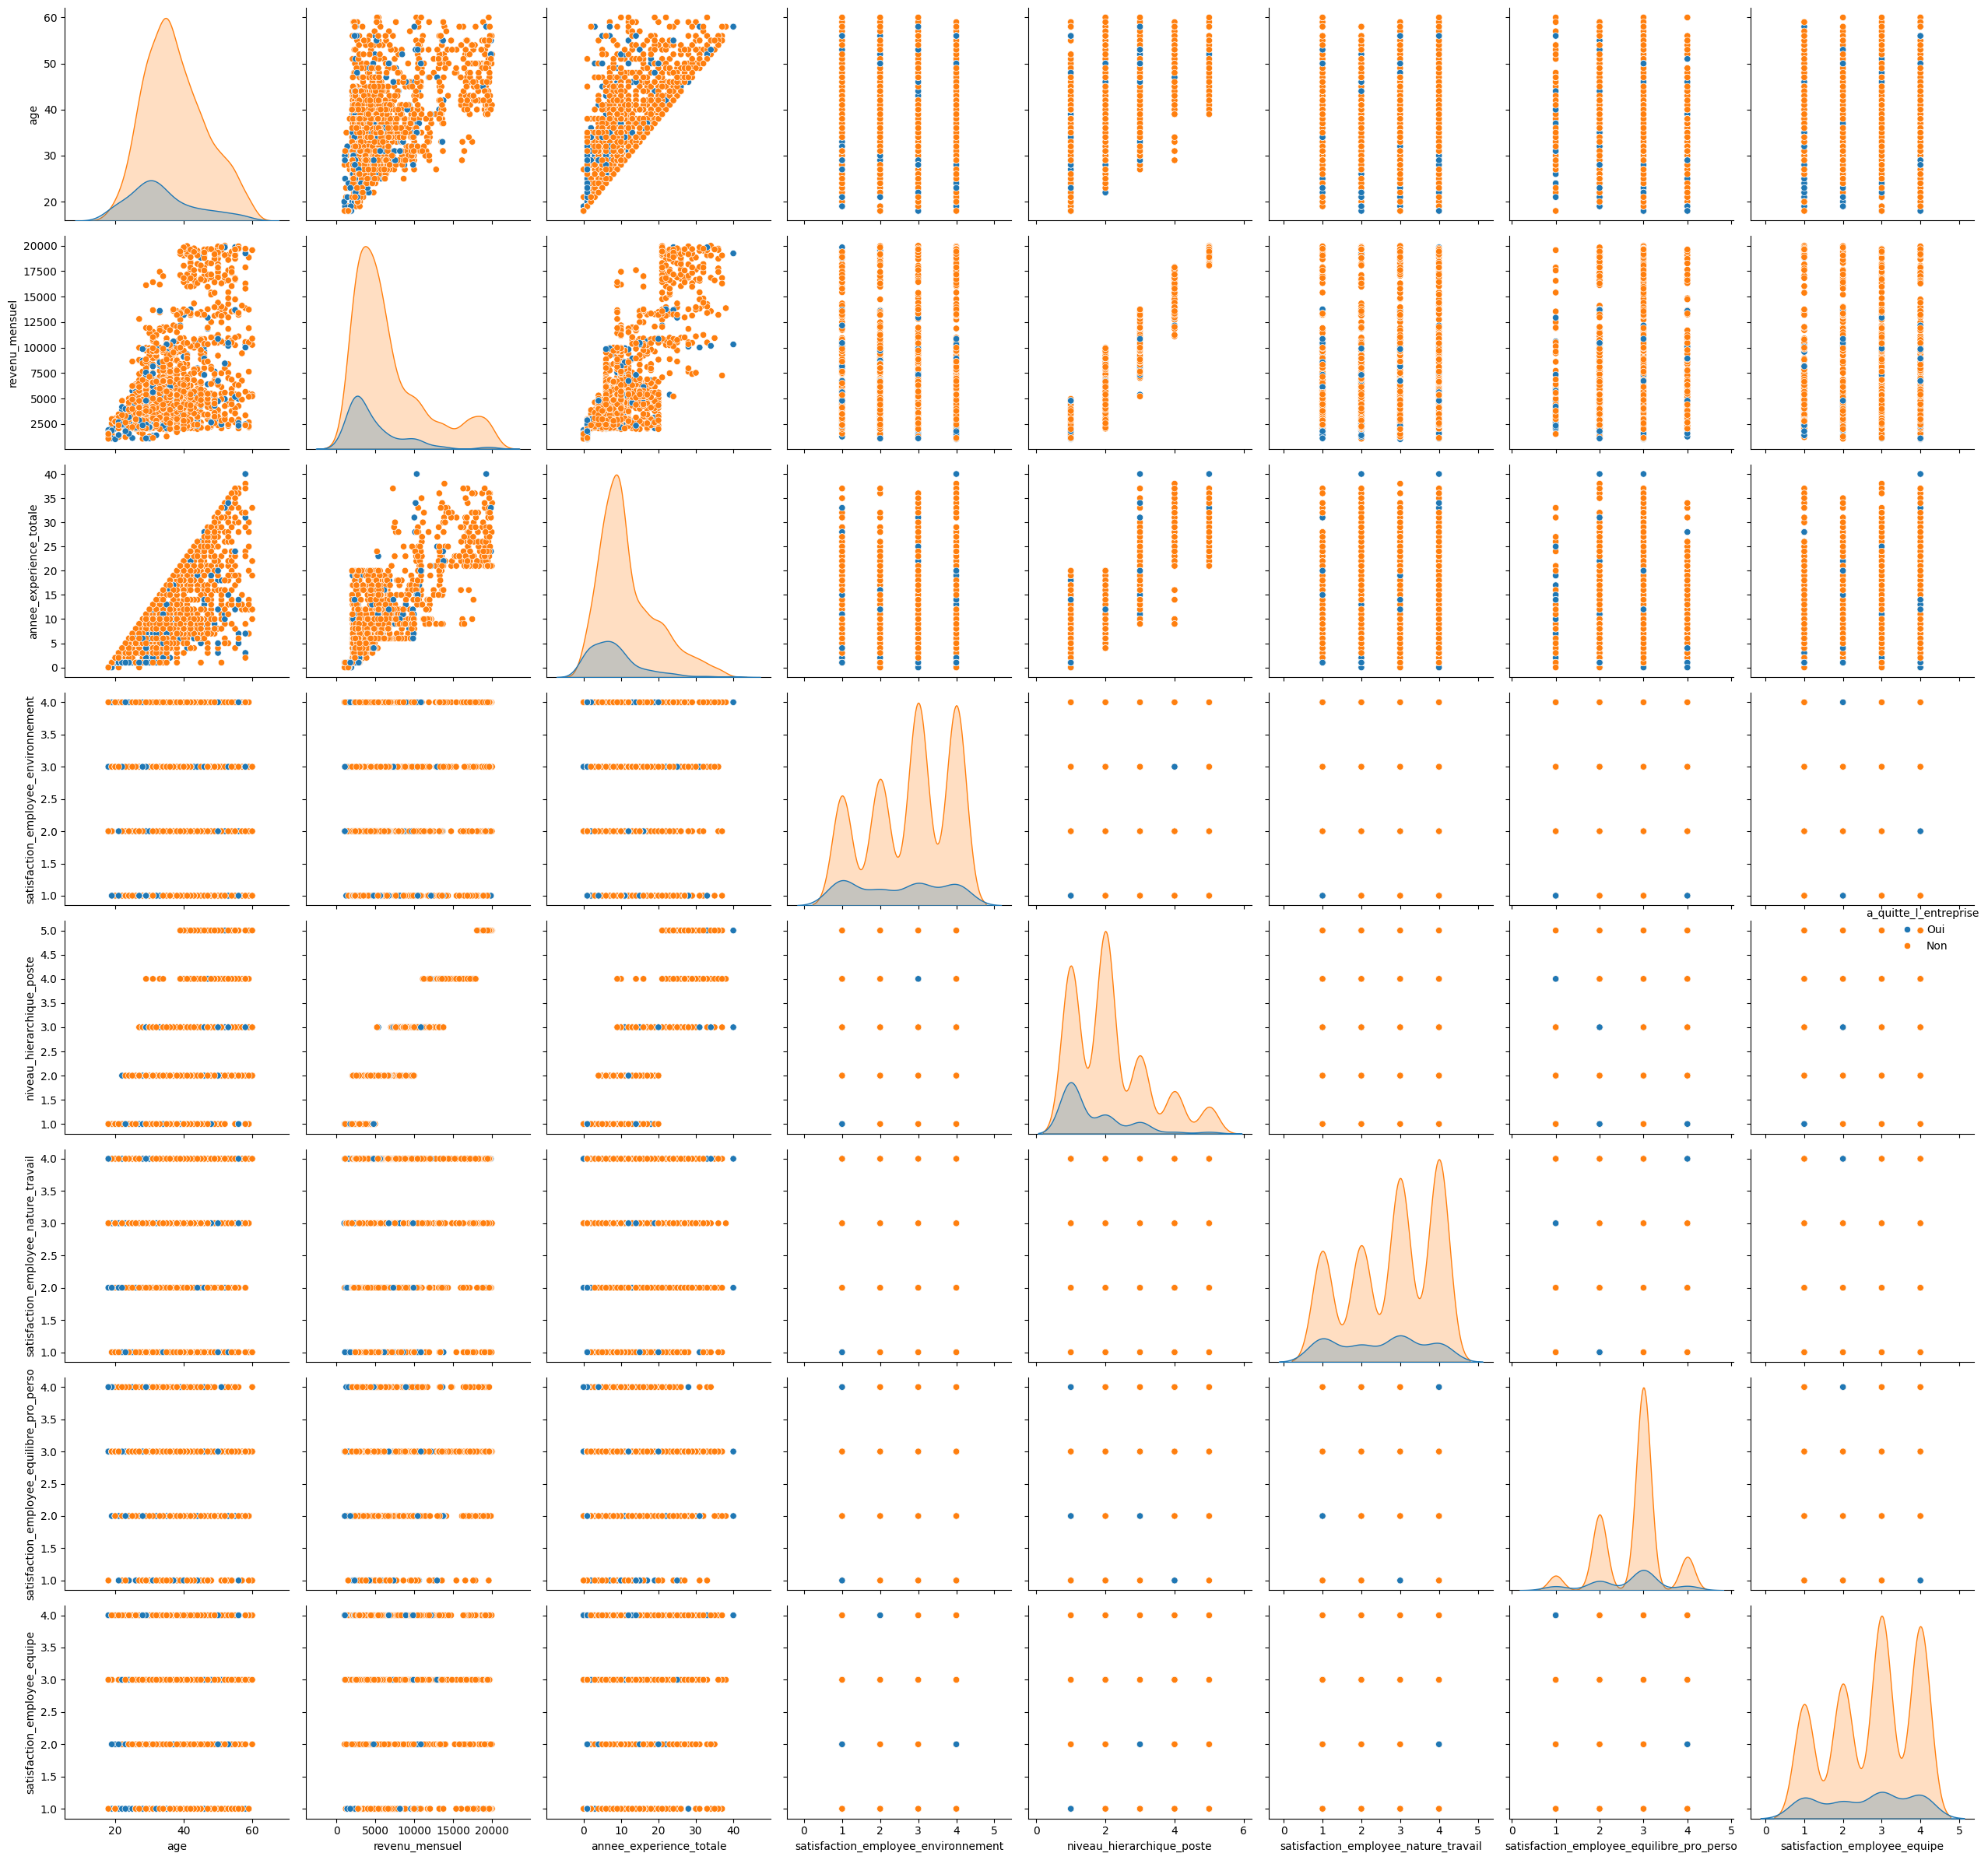

In [78]:
cols = [
    'age', 'revenu_mensuel', 'annee_experience_totale','a_quitte_l_entreprise',
    "satisfaction_employee_environnement",
    "niveau_hierarchique_poste",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equilibre_pro_perso",
    "satisfaction_employee_equipe"
    ]
data_pairplot = donnees_rh[cols]

sns.pairplot(data_pairplot, hue = 'a_quitte_l_entreprise', height=3)
plt.tight_layout()
plt.show()

* On peut observer une relation intéressante entre le hiérarchique et le salaire, on voit bien la différence de revenu en fontion du niveau et on observe des départs sur la partie basse des salaires.
* Difficile d'analyser les différents sondages mais on peut relever pas mal de départs présents dans le score 1 du sondage lié à l'environnement dans l'entreprise. On remarque bien une population partie plutôt jeune.

On peut compléter par une analyse des boxplot des sondages même si c'est moins parlant.

In [79]:
cols_scores = [
    "satisfaction_employee_environnement",
    "note_evaluation_precedente",
    "niveau_hierarchique_poste",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
]

df_long = donnees_rh[["a_quitte_l_entreprise"] + cols_scores].melt(
    id_vars="a_quitte_l_entreprise", 
    var_name="Variable", 
    value_name="Score"
)
fig7 = px.box(
    df_long,
    x="Variable",
    y="Score",
    color="a_quitte_l_entreprise",
    title="Distribution des scores de sondage selon la cible (Oui/Non)",
    points="all",
)

fig7.update_layout(
    width=1100,
    height=650,
    title_x=0.5,
    xaxis_title="Variables de sondage",
    yaxis_title="Score"
)

fig7.show()
pio.write_image(fig7, "../Graph/graph_etape_1/Boxplot_cible_sondages.png")

Analyse globale de la partie sondage & hiérarchie des poste : pairplot + boxpplot

* Ici on peut voir que les variables note_evualation_precedente / satisfaction_employee_equipe et satisfaction_employee_equilibre_pro_perso avec des éléments très proches entre le Oui et le Non. Nous allons vérifier avec un tableau en peu en dessous, si les chiffres montrent la même chose, nous pourrons supprimer les éléments.
* niveau_hierarchique_poste = pour les non : les postes les plus impactés ne sont pas les niveaux managériaux. Mise à part deux personnes qui apparaissent aussi en décalage dans les revenus et le nombre d'années dans l'entreprise
* satisfaction_employee_nature_travail = on voit un décalage entre les Oui et les Non avec des plus mauvais scores pour ceux qui sont parties
* satisfaction_employee_environnement = présence de note plus faible concernant l'environnement de travail concernant les départs de l'entreprise


#### Regardons le % de Oui/Non de notre cible sur des colonnes avec un besoin d'une plus grande analyse. Le but est de repérer les colonnes sans informations particulières.

In [80]:
colonnes_a_exclure = [
    "id_employee", "age", "revenu_mensuel","genre","niveau_hierarchique_poste",
    "annees_dans_l_entreprise","distance_domicile_travail","annee_experience_totale"
    ]
for col in donnees_rh.columns:
    if col in colonnes_a_exclure:
        continue
    print(f"\n=== {col} ===")
    print(
        pd.crosstab(
            donnees_rh[col], 
            donnees_rh['a_quitte_l_entreprise'], 
            normalize=True
        ) * 100
    )


=== statut_marital ===
a_quitte_l_entreprise        Non       Oui
statut_marital                            
Celibataire            23.809524  8.163265
Divorce                20.000000  2.244898
Marie                  40.068027  5.714286

=== departement ===
a_quitte_l_entreprise        Non       Oui
departement                               
Commercial             24.081633  6.258503
Consulting             56.326531  9.047619
RessourcesHumaines      3.469388  0.816327

=== poste ===
a_quitte_l_entreprise         Non       Oui
poste                                      
AssistantdeDirection    16.666667  3.197279
CadreCommercial         18.299320  3.877551
Consultant              13.401361  4.217687
DirecteurTechnique       5.306122  0.136054
Manager                  8.299320  0.612245
ReprésentantCommercial   3.401361  2.244898
RessourcesHumaines       2.721088  0.816327
SeniorManager            6.598639  0.340136
TechLead                 9.183673  0.680272

=== nombre_experiences_pr

#### Identification des colonnes avec des informations relativement intéressantes

* statut_marital : un peu plus de personnes célibataires ont démissionné
* nombre_participation_pee : beaucoup de démissionaires ne l'ont pas touché, cela confirme que ce sont des personnes qui ne sont pas dans l'entreprise depuis longtemps
* satisfaction_employee_equilibre_pro_perso : on peut noter un peu plus de départs pour les salariés ayant indiqué une note de 3 à l'équilibre pro/perso


#### Identification des colonnes sans informations pertinentes

* satisfaction_employee_equipe : le sondage ne donne pas de résultats intéressants, c'est plutôt équilibré entre les scores et risque d'être redondant avec d'autres informations
* annes_sous_responsable_actuel : pas d'écarts flagrants entre le Oui et le Non et a la même distribution (pairplot) avec d'autres variables
* domaine_etude : redondant avec poste
* note_evualation_precedente : le sondage ne donne pas de résultats intéressants, c'est plutôt équilibré entre les scores et risque d'être redondant avec d'autres informations
* satisfaction_employee_equilibre_pro_perso : le sondage ne donne pas de résultats intéressants, c'est plutôt équilibré entre les scores et risque d'être redondant avec d'autres informations
#### On décide de supprimer ces informations

In [81]:
colonnes_a_supprimer = [
    'satisfaction_employee_equipe',
    'annes_sous_responsable_actuel',
    'domaine_etude','note_evaluation_precedente','satisfaction_employee_equilibre_pro_perso'
    ]
donnees_rh = donnees_rh.drop(columns=colonnes_a_supprimer)

* Petit récapitulatif

In [82]:
shape_donnees_rh_un = donnees_rh.shape
print("Nous avons", shape_donnees_rh[0],"lignes et",shape_donnees_rh[1],"colonnes après jointure des 3 fichiers de base")
print("Nous avons", shape_donnees_rh_un[0],"lignes et",shape_donnees_rh_un[1],"colonnes après suppression de 5 colonnes")

Nous avons 1470 lignes et 28 colonnes après jointure des 3 fichiers de base
Nous avons 1470 lignes et 23 colonnes après suppression de 5 colonnes


In [83]:
donnees_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   id_employee                               1470 non-null   object
 1   age                                       1470 non-null   int64 
 2   genre                                     1470 non-null   object
 3   revenu_mensuel                            1470 non-null   int64 
 4   statut_marital                            1470 non-null   object
 5   departement                               1470 non-null   object
 6   poste                                     1470 non-null   object
 7   nombre_experiences_precedentes            1470 non-null   int64 
 8   annee_experience_totale                   1470 non-null   int64 
 9   annees_dans_l_entreprise                  1470 non-null   int64 
 10  annees_dans_le_poste_actuel               1470 n

### Petite conclusion sur les grandes différences entre les départs et ceux encore dans l'entreprise :
Les salariés qui ont démissionné ont :
* un salaire plus faible en moyenne que les autres (4787€ vs 6832€)
* une distance pour aller au travail qui est plus longue (11km vs 9km)
* moins d'ancienneté dans l'entreprise (8ans vs 12 ans)
* un niveau hierarchique plus bas
* en moyenne un plus jeune âge (34ans vs 38ans)
* ont moins d'expérience au total (5ans vs 7 ans)
* un turnover elevé en consulting (mais plutot logique étant donnée le métier de l'entreprise et la proportion de département)
* une appréciation de la qualité de l'environnement de travail plus faible

#### Récapitualtif des éléments restants

Variables quantitatives

Continues
* age
* revenu_mensuel
* annee_experience_totale
* distance_domicile_travail
* annees_dans_l_entreprise (pas dans discrète car nous n'avons pas que quelques valeurs différentes)
* annees_dans_le_poste_actuel (pas dans discrète car nous n'avons pas que quelques valeurs différentes)

Discrètes (durées en années → pas “vraiment” continues)
* nombre_participation_pee
* annees_depuis_la_derniere_promotion
* nombre_experiences_precedentes

Scores / Ordinales codées en chiffres (échelles de 1–4 ou 1–5 : pas continues mais ordonnées)
* satisfaction_employee_environnement
* niveau_hierarchique_poste
* satisfaction_employee_nature_travail
* niveau_education
* augmentation_salaire_precedente_pourcent


Variables qualitatives

Nominales
* id_employee (identifiant technique → à exclure par la suite)
* genre
* statut_marital
* departement
* poste
* frequence_deplacement

Binaires (Oui/Non)
* heure_supplementaires
* a_quitte_l_entreprise

### Quelques représentations graphiques de notre petite conclusion

#### Relation entre la cible et le niveau hiérarchique

In [84]:
fig8 = px.histogram(
    donnees_rh, x='niveau_hierarchique_poste',color='a_quitte_l_entreprise',
     barmode='group',title='Relation cible et niveau hierarchique'
     )
fig8.update_layout(height=500, width=800)
fig8.show()
pio.write_image(fig8,"../Graph/graph_etape_1/Histo_Cible_niveau_hierarchique.png")

* On observe plus de départs sur les postes de niveaux 1 et 2, dont 143 pour le niveau 1 sur 237 départs au total.

#### Relation entre la cible et le revenu mensuel

In [85]:
fig9 = px.histogram(
    donnees_rh, x='revenu_mensuel',color='a_quitte_l_entreprise',
     barmode='group',title='Relation cible et revenu mensuel'
     )
fig9.update_layout(height=500, width=800)
fig9.show()
pio.write_image(fig9,"../Graph/graph_etape_1/Histo_Cible_revenu.png")

* On voit une concentration de salaire plus faible pour les départs.

#### Relation cible et l'âge

In [86]:
fig10 = px.histogram(donnees_rh, x='age',color='a_quitte_l_entreprise')
fig10.update_layout(height=400, width=700)
fig10.show()
pio.write_image(fig10,"../Graph/graph_etape_1/Histo_Cible_age.png")

* On peut remarquer une plus grande concentration des départs sur une tranche d'âge aux alentours des 30 ans. Pour les salariés, la concentration se trouve un peu plus haut, 35-40ans.

Répartition des postes des employés ayant quitté l'entreprise

In [87]:
poste_graph = (
    donnees_rh.loc[donnees_rh['a_quitte_l_entreprise'] == 'Oui', 'poste']
    .value_counts()
    .reset_index()
)
fig11 = px.pie(
    poste_graph,
    names="poste",
    values="count",
    title="Répartition des postes des employés ayant quitté l'entreprise"
)
fig11.update_layout(height=600, width=650)
fig11.show()
pio.write_image(fig11,"../Graph/graph_etape_1/Pie_repartition_poste_dem.png")

* Un peu plus de la moitié des départs se concentrent sur la profession de Consultant et Cadre Commercial.

#### Relation entre la cible et la fréquence de déplacement

In [88]:
fig12 = px.histogram(
    donnees_rh, x='frequence_deplacement',color='a_quitte_l_entreprise',
     barmode='group',title='Relation cible et fréquence de déplacement'
     )
fig12.update_layout(height=500, width=800)
fig12.show()
pio.write_image(fig12,"../Graph/graph_etape_1/Histo_Cible_frequence deplacement.png")

* 156 départs avaient des déplacements occasionnels, ce qui n'est pas étonnant vu les 2 métiers les plus représentés dans les départs, Consultant et Cadre Commercial.

#### Relation entre la cible et la satisfaction de l'environnement

In [89]:
fig13 = px.histogram(
    donnees_rh, x='satisfaction_employee_environnement',color='a_quitte_l_entreprise',
     barmode='group',title='Relation cible et satisfaction environnement'
     )
fig13.update_layout(height=500, width=800)
fig13.show()
pio.write_image(fig13,"../Graph/graph_etape_1/Histo_Cible_cible_enviro.png")

La catégorie la plus élevée pour les Oui est la plus mauvaise note (1) alors que pour les Non, le score monte à 3, un score moyen-bon. On peut noter la différence d'appréciation de l'environnement du travail.

### Appliquons une matrice de corrélation pour identifier les variables fortement correlées entre elles

Nous ne sommes pas dans une distribution linéaire parfaite, nous allons donc utiliser le coefficient de Spearman pour regarder les différentes relations entre nos variables.

In [90]:
donnees_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   id_employee                               1470 non-null   object
 1   age                                       1470 non-null   int64 
 2   genre                                     1470 non-null   object
 3   revenu_mensuel                            1470 non-null   int64 
 4   statut_marital                            1470 non-null   object
 5   departement                               1470 non-null   object
 6   poste                                     1470 non-null   object
 7   nombre_experiences_precedentes            1470 non-null   int64 
 8   annee_experience_totale                   1470 non-null   int64 
 9   annees_dans_l_entreprise                  1470 non-null   int64 
 10  annees_dans_le_poste_actuel               1470 n

#### Colonnes numériques pour notre matrice

In [91]:
col_num = [
    'age','revenu_mensuel','nombre_experiences_precedentes','annee_experience_totale',
    'annees_dans_l_entreprise','annees_dans_le_poste_actuel',
    'niveau_hierarchique_poste','augmentation_salaire_precedente_pourcent','nombre_participation_pee','distance_domicile_travail',
    'niveau_education','annees_depuis_la_derniere_promotion','nb_formations_suivies'
    ]
corr_donnees_rh = donnees_rh[col_num]

#### Création de notre matrice de corrélation de Spearman

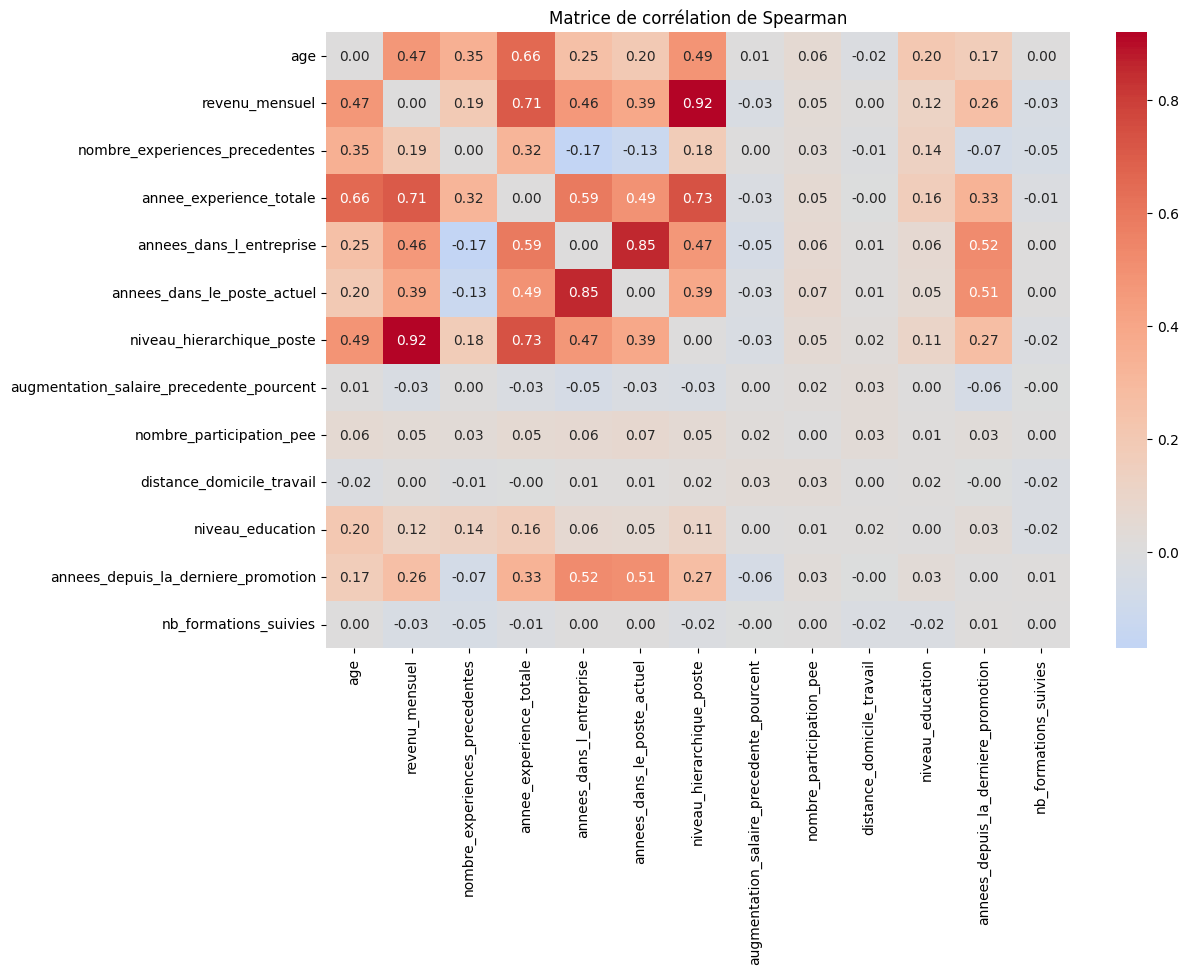

In [92]:
spearman_corr = corr_donnees_rh.corr(numeric_only=True, method='spearman')
np.fill_diagonal(spearman_corr.values, 0)
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Matrice de corrélation de Spearman")
plt.show()

A partir de cette matrice, on peut identifier des variables à supprimer car trop correlés :
* niveau_hierarchique_poste car fortement correlé à deux autres variables (revenu_mensuel et annee_experience_totale)
* annees_dans_le_poste_actuel qui est très correlé avec annees_dans_l_entreprise. On décide de garder la deuxième car plus généraliste, on supprime annees_dans_le_poste_actuel
* relation entre le revenu_mensuel et l'annee_experience_totale, on les garde pour le moment car important pour le feature engineering

Hors matrice, on décide de supprimer également :
* departement : car nous avons un détail plus fin par poste qui sera plus utile pour les modèles
* id_employee : car nous n'avons plus besoin d'identifier les salariés

In [93]:
a_supprimer =  ['niveau_hierarchique_poste','annees_dans_le_poste_actuel','departement','id_employee']
donnees_rh = donnees_rh.drop(columns = a_supprimer)

Petit récapitulatif

In [94]:
shape_donnees_rh_deux = donnees_rh.shape
print("Nous avons", shape_donnees_rh[0],"lignes et",shape_donnees_rh[1],"colonnes après jointure des 3 fichiers de base")
print("Nous avons", shape_donnees_rh_un[0],"lignes et",shape_donnees_rh_un[1],"colonnes après suppression de 5 colonnes")
print("Nous avons", shape_donnees_rh_deux[0],"lignes et",shape_donnees_rh_deux[1],"colonnes après suppression de 2 colonnes redondantes et 2 colonnes inutiles")

Nous avons 1470 lignes et 28 colonnes après jointure des 3 fichiers de base
Nous avons 1470 lignes et 23 colonnes après suppression de 5 colonnes
Nous avons 1470 lignes et 19 colonnes après suppression de 2 colonnes redondantes et 2 colonnes inutiles


### Enregistrement du notebook de la première étape du projet 4

In [95]:
donnees_rh.to_csv("../Data/Processed/Projet_4_etape1_clean.csv", index=False)